```
可以主要看一下
更新数据、pair trading的部分
```

```
脱离彭博终端, 运行方法
1. 保证每日的数据最新,data文件夹里有data.csv和etf_pair_code.xlsx;
2. 根目录下有utils.py和utils_update.py两个文件;
3. 最后在notebook中运行代码即可
```

### import libraries

In [1]:
%load_ext autoreload
%autoreload 2
from utils import *

In [2]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

### 更新数据

每日只需要运行一次

In [ ]:
from utils_update
update()

### function

#### 从数据文件中获取数据

##### data文件夹内默认只有从Bloomberg获取到的数据，数据文件名为'data.csv'

In [25]:
path = 'data/data.csv'
data = get_data(path)

In [4]:
data.head()

high      open       low    volume  Adj Close
date       code                                                     
2010-01-04 036570  141237.0  136143.0  136143.0  236774.0   138458.0
           053800   24670.0   21949.0   21488.0  448371.0    24670.0
           069080   11700.0   11200.0   11050.0  151712.0    11550.0
           078340   13341.0   11973.0   11973.0  951783.0    13341.0
           095660   42600.0   41300.0   41050.0  390371.0    41500.0

##### 选取单个ticker的数据

In [5]:
code = '700'

In [6]:
data.loc[(slice(None), code),:].head()

,,high,open,low,volume,Adj Close
date,code,,,,,
2010-01-04,700,32.932,32.619,32.502,11261945.0,32.814
2010-01-05,700,33.791,32.678,32.639,24423510.0,33.557
2010-01-06,700,34.182,33.713,33.576,23279845.0,33.635
2010-01-07,700,33.850,33.635,32.228,27930995.0,32.346
2010-01-08,700,33.010,31.916,31.916,19976110.0,32.795


亦可以用utils中的函数select_code

In [7]:
select_code(data, code).head()

,high,open,low,volume,Adj Close
date,,,,,
2010-01-04,32.932,32.619,32.502,11261945.0,32.814
2010-01-05,33.791,32.678,32.639,24423510.0,33.557
2010-01-06,34.182,33.713,33.576,23279845.0,33.635
2010-01-07,33.850,33.635,32.228,27930995.0,32.346
2010-01-08,33.010,31.916,31.916,19976110.0,32.795


##### 选取一组tickers的数据

```
比如我们想获取某个ETF的数据
首先就是需要知道这个ETF里由哪些tickers构成
```

使用utils中的函数get_code_list_by_etf拿到PSJ的tickers list

In [8]:
# 我们先拿到PSJ的tickers list
df_code = pd.read_excel('data/etf_pair_code.xlsx', dtype={'symbol':str})
psj_code_list = get_code_list_by_etf(df_code, 'PSJ', 'all').symbol.tolist()
data.loc[(slice(None), psj_code_list),:].head()

high     open      low     volume  Adj Close
date       code                                                 
2010-01-04 ADBE  37.3000  36.6500  36.6500  4710112.0    37.0900
           ALRM      NaN      NaN      NaN        NaN        NaN
           ALTR      NaN      NaN      NaN        NaN        NaN
           ATVI  10.4115  10.2115  10.1387  9310055.0    10.2751
           BAND      NaN      NaN      NaN        NaN        NaN

```
也可以任意提取想要ticker的数据
```

In [9]:
some_code_list = ['MSFT', 'AMZN', '700']
data.loc[(slice(None), some_code_list),:].head()

high      open       low      volume  Adj Close
date       code                                                     
2010-01-04 700    32.9320   32.6190   32.5020  11261945.0    32.8140
           AMZN  136.6100  136.2500  133.1400   7600543.0   133.9000
           MSFT   24.8407   24.4573   24.4334  38414185.0    24.7209
2010-01-05 700    33.7910   32.6780   32.6390  24423510.0    33.5570
           AMZN  135.4790  133.4300  131.8100   8856456.0   134.6900

##### 按时间获取数据

In [10]:
# 某一天的数据
data.loc[('2010-01-04',slice(None)),:].head()

high      open       low    volume  Adj Close
date       code                                                     
2010-01-04 036570  141237.0  136143.0  136143.0  236774.0   138458.0
           053800   24670.0   21949.0   21488.0  448371.0    24670.0
           069080   11700.0   11200.0   11050.0  151712.0    11550.0
           078340   13341.0   11973.0   11973.0  951783.0    13341.0
           095660   42600.0   41300.0   41050.0  390371.0    41500.0

In [11]:
# 某一个月的数据
data.loc[('2010-02',slice(None)),:].head()

high      open       low    volume  Adj Close
date       code                                                     
2010-02-01 036570  122714.0  121324.0  116694.0  258986.0   121324.0
           053800   21995.0   21442.0   21073.0  104049.0    21212.0
           069080   13600.0   12950.0   12500.0  260707.0    13100.0
           078340   11332.0   11118.0   10861.0  380158.0    11246.0
           095660   32100.0   31650.0   30200.0  255557.0    30950.0

In [16]:
# 某一年的数据
data.loc[(('2019'),slice(None)),:].head()

high  open  low  volume  Adj Close
date       code                                    
2018-01-01 ACAD   NaN   NaN  NaN     NaN        NaN
           AERI   NaN   NaN  NaN     NaN        NaN
           AGIO   NaN   NaN  NaN     NaN        NaN
           AIMT   NaN   NaN  NaN     NaN        NaN
           AKCA   NaN   NaN  NaN     NaN        NaN

In [20]:
# 某一年的数据
data.loc[(slice('2018','2019'),slice(None)),:].head()

high      open       low    volume  Adj Close
date       code                                                     
2018-01-02 036570  452500.0  448000.0  442000.0  121955.0   446500.0
           053800   54300.0   54200.0   52700.0  146558.0    53300.0
           069080   39100.0   39100.0   37550.0  781185.0    38500.0
           078340  137927.0  134761.0  132584.0   74158.0   135058.0
           095660   12800.0   12250.0   12200.0  177334.0    12750.0

In [21]:
data.loc[(slice('2018','2019'),slice(None)),:].tail()

high     open      low      volume  Adj Close
date       code                                                  
2019-01-17 9684  3430.00  3345.00  3315.00    767100.0    3420.00
           9697  2214.00  2179.00  2157.00    488900.0    2204.00
           9766  5040.00  4995.00  4940.00    295600.0    4955.00
           981      6.70     6.56     6.52   9717418.0       6.60
           992      5.53     5.50     5.43  41066809.0       5.49

##### 某个时间段某些股票的数据

In [13]:
some_code_list = ['MSFT', 'AMZN', '700']
data.loc[('2018', some_code_list),:].head()

high       open        low      volume  Adj Close
date       code                                                        
2018-01-02 700    417.0680   407.0910   406.6920  24080505.0   416.8690
           AMZN  1190.0000  1172.0000  1170.5100   2694494.0  1189.0100
           MSFT    84.8413    84.6594    84.0451  22483797.0    84.4874
2018-01-03 700    425.8490   423.0550   418.0660  22780154.0   421.2590
           AMZN  1205.4900  1188.3000  1188.3000   3108793.0  1204.2000

### 计算pair trading

In [14]:
np.array(etf_list)

array(['XLK', 'PNQI', 'CQQQ', 'GAMR', 'PSJ', 'SKYY', 'HACK', 'SOXX',
       'SMH', 'XLV', 'IBB', 'ITA', 'XLP', 'XLY', 'IAI', 'VDE', 'XLB'],
      dtype='<U4')

In [55]:
result = calc_pair_trading('SMH', method='rolling', period=245, is_saving=False,
                          save_name='SMH_sample')

In [69]:
result = calc_pair_trading('SMH', method='ewm', period=245, is_saving=True,
                          save_name='SMH_ewm')


finish, see you          


In [ ]:
# if 'HKD' in CQQQ_code_list:
#     CQQQ_code_list.remove('HKD')
# if 'ita' in CQQQ_code_list:
#     CQQQ_code_list.remove('ita')

### 计算相关性系数矩阵

```
目前使用的是调整后的收盘价去计算的相关性系数
```

```
calc_corr使用方法
1. 指定etf代码, 或者一组tickers的list;
2. 指定用哪段时间的数据, 去计算相关性系数矩阵;
```

#### 计算17年到19年的，CQQQ的相关性系数矩阵

In [37]:
corr = calc_corr('CQQQ', '2017-01', '2019-01')

In [38]:
corr.head()

code,1089,1236,1347,1357,1385,148,1686,1888,1980,2018,...,RENN,SFUN,SINA,SOHU,VNET,WB,WUBA,XNET,YRD,YY
code,,,,,,,,,,,,,,,,,,,,,
1089,1.000000,-0.148391,0.845467,-0.511296,0.665414,-0.177921,0.340100,-0.160825,-0.024031,-0.136452,...,0.770659,-0.154494,-0.156777,-0.383557,0.554563,0.045818,0.372207,0.278904,-0.358772,0.226607
1236,-0.148391,1.000000,-0.830052,-0.841366,0.461474,-0.086442,-0.580102,-0.306248,-0.244153,-0.617997,...,0.469702,0.679337,-0.136925,-0.676031,0.813024,-0.129306,-0.797791,0.052614,-0.637898,-0.705253
1347,0.845467,-0.830052,1.000000,-0.471972,0.761564,-0.029322,0.445949,0.050718,0.201363,0.065554,...,0.777423,0.097175,0.034959,-0.421716,0.617177,0.340047,0.627661,0.585744,-0.203518,0.533432
1357,-0.511296,-0.841366,-0.471972,1.000000,-0.699346,0.623577,0.025489,0.615884,0.558814,0.669046,...,-0.702677,0.591602,0.592145,0.842957,-0.705686,0.310901,-0.130907,0.064005,0.740112,0.133592
1385,0.665414,0.461474,0.761564,-0.699346,1.000000,-0.206872,0.304834,-0.213088,-0.150357,-0.213519,...,0.742833,-0.174713,-0.237137,-0.622328,0.803180,0.091101,0.561480,0.419750,-0.359654,0.317477


In [29]:
# 设置保存文件的路径
path = 'result/cqqq_corr.xlsx'

# 将结果保存到excel表中
writer = pd.ExcelWriter(path)
corr.to_excel(writer)
writer.save()

```
用热力图展示结果
ps: 如果对CQQQ这类个数较多的标的画图时, 请将
'figure.figsize'设置的大一些, 比如[54, 54]
相应的, 个数较少时, 可以设置的小一点
```

In [51]:
plt.rcParams['figure.figsize'] = [54, 54]

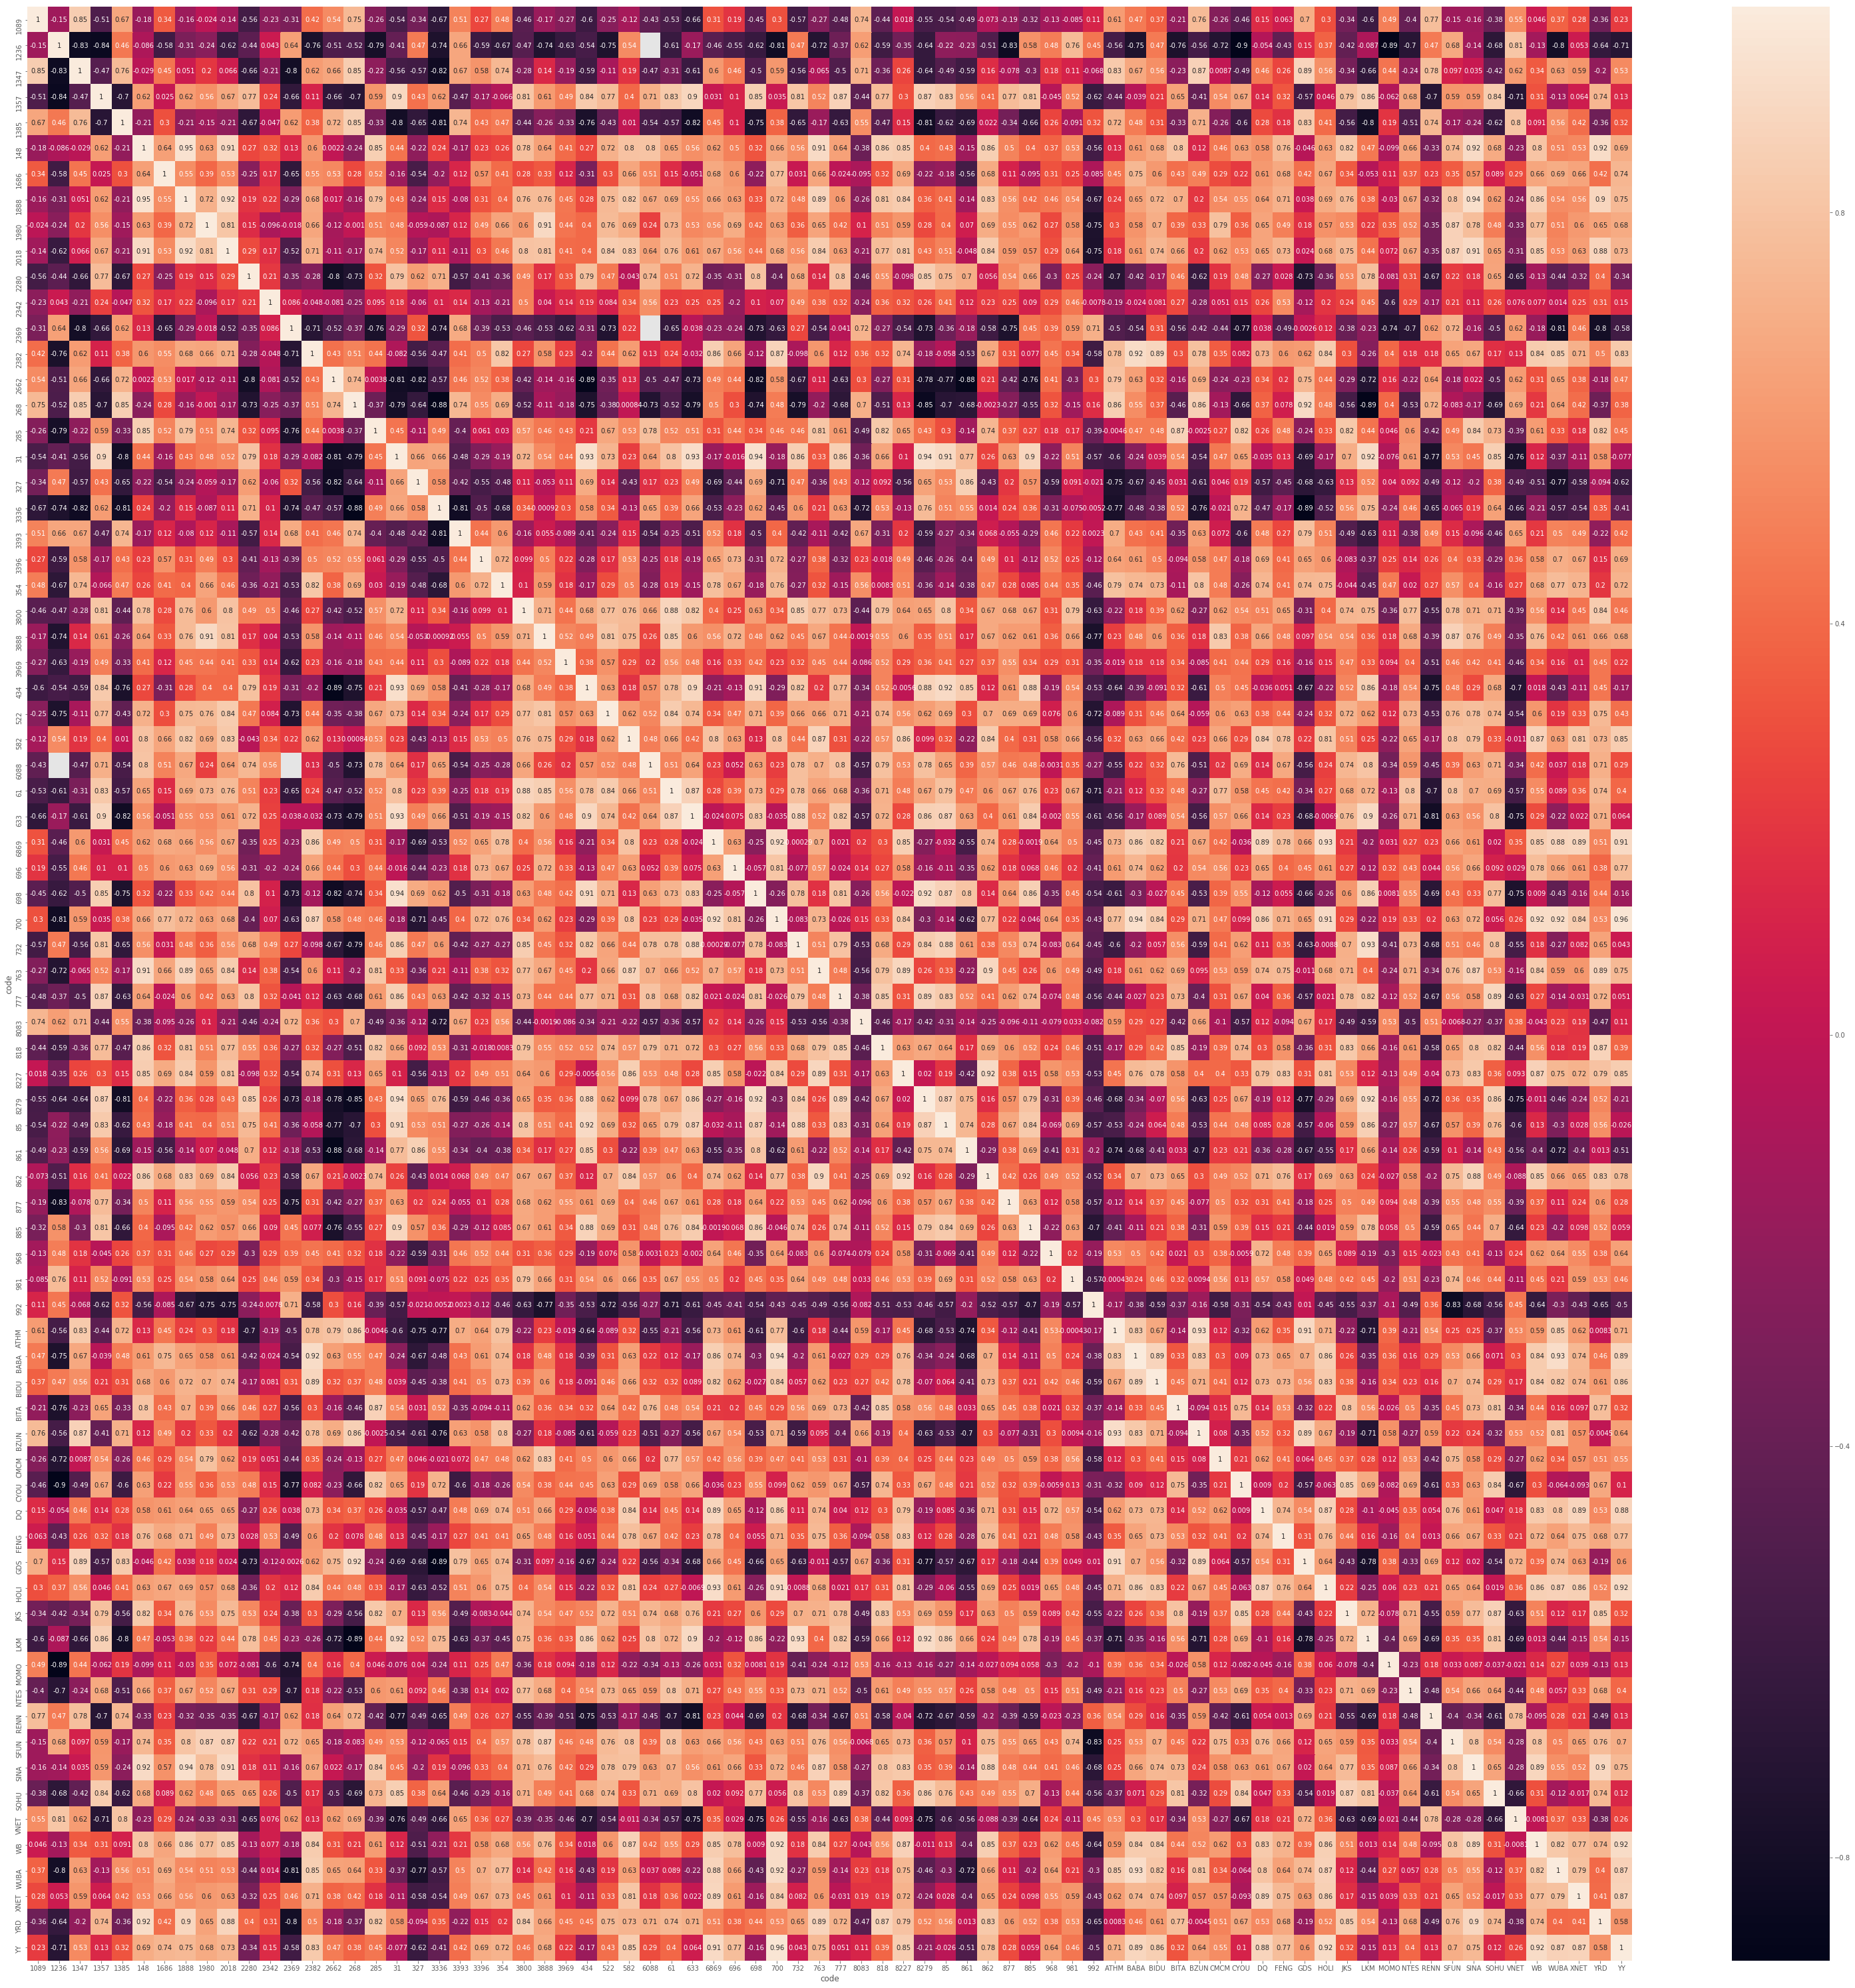

In [52]:
# 图片较大时, 画图的时间稍微有点慢, 图片生成后, 可以双击查看
sns.heatmap(corr, annot=True);
plt.savefig('result/cqqq_corr.png', bbox_inches = 'tight');

#### 指定一组tickers计算相关性系数矩阵

In [43]:
codes = ['MSFT', 'AMZN', '700', 'BABA', 'GOOG']
self_corr = calc_corr(codes, '2015-01', '2019-01')

In [44]:
self_corr

code,700,AMZN,BABA,GOOG,MSFT
code,,,,,
700,1.000000,0.840102,0.972634,0.901837,0.860169
AMZN,0.840102,1.000000,0.840005,0.953323,0.984932
BABA,0.972634,0.840005,1.000000,0.884877,0.868926
GOOG,0.901837,0.953323,0.884877,1.000000,0.955820
MSFT,0.860169,0.984932,0.868926,0.955820,1.000000


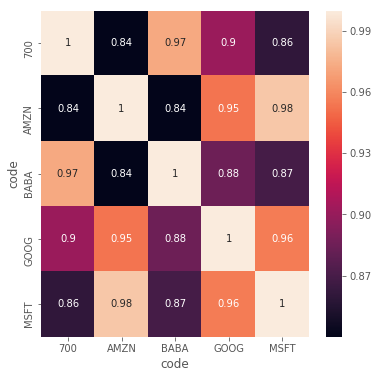

In [53]:
plt.rcParams['figure.figsize'] = [6, 6]
sns.heatmap(self_corr, annot=True);